In [163]:
import pandas as pd
import numpy as np

In [164]:
df= pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [165]:
# Displaying information about the dataframe including columns, non-null count, and data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [166]:
# checking null values in the data:
df.isnull().count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [167]:
# checking the data_types in the data:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [168]:
# checking the shape of the data frame:
df.shape

(5000, 14)

#### From the above data, we can observe that there are 14 attribute and 5000 records in total with no null values in the data. 

In [169]:
# distruting the various attribute:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### In this case we can see that the experinece column have a negative data which we need to correct. 

In [170]:
# identifying how many negative numbers in the data:
df_negative = df[df['Experience']<0]['Experience'].count()
df_negative



0

In [171]:
# Counting the number of negative values:
df_negative= df[df['Experience']<0]['Experience'].value_counts()
df_negative

Series([], Name: count, dtype: int64)

In [172]:
# calculate the median :
median = df['Experience'][df['Experience']>=0].median()

# replacing negative values with the median value:
df.loc[df['Experience']<0, 'Experience']= median

# Verify the change
print(df['Experience'].describe())

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


In [173]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### I used KNN model for machine learning by using only Numpy. It normalizes the features, trains the model on the training data, and then makes predictions on the test data. The accuracy of the model is then calculated and printed.
So, this approach avoids using specialized machine learning libraries, it may not be as optimized or efficient as those libraries for large datasets. However, it provides a good starting point for understanding the algorithm and its application to your loan prediction problem



In [174]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Prepare your data
X = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']].values
y = df['Personal Loan'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train_normalized = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_normalized = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Create and train the KNN model
knn = KNN(k=5)
knn.fit(X_train_normalized, y_train)

# Make predictions
predictions = knn.predict(X_test_normalized)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


#### In the previous code, I implemented a K-Nearest Neighbors (KNN) model. KNN works by finding the 'k' closest customers in terms of features and predicting based on the majority class among those neighbors.

Here’s the step-by-step process I followed:

Data Preparation: Selected features such as age, income, credit card spending, and account types. Split the dataset into training (80%) and testing (20%).
Normalization: Standardized the features to ensure consistency in scaling.
Model Training: Built a KNN model with k=5 to classify customers based on their similarity to others.\
Prediction and Accuracy: The model achieved 96% accuracy, demonstrating its effectiveness in identifying high-potential customers for targeted marketing.

#### 1. Analyze Model Performance such as including precision, recall, and F1-score for each class.

In [175]:
from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[890   5]
 [ 34  71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.93      0.68      0.78       105

    accuracy                           0.96      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.96      0.96      0.96      1000



#### In the previous code I was working on Model Evaluation: 

**Why this code is used:**  
In order to evaluate the performance of the KNN model and understand how well it predicts loan acceptance.

**This code provides:**  
1. **Confusion Matrix:** Breaks down correct and incorrect predictions for both loan and non-loan customers.  
   - Helps identify false positives (predicting loan incorrectly) and false negatives (missing actual loan customers).  
2. **Classification Report:** Provides precision, recall, F1-score, and accuracy to evaluate the model's predictive power in detail.  

**it's really important because it shows the following results such as:**
- **Precision (93%):** Ensures marketing campaigns target actual loan customers, reducing wasted efforts.  
- **Recall (68%):** Highlights the need to improve identifying all potential loan customers.  
- **Accuracy (96%):** Confirms the model’s overall reliability, ensuring effective decision-making for marketing strategies.  
This evaluation helps refine the model and focus on improving recall for better campaign success.  


#### 2. Feature Importance Analysis:
Since KNN doesn't provide built-in feature importance, you can use a simple correlation analysis:

In [176]:
# Calculate correlation with target variable
correlation = df.corr()['Personal Loan'].sort_values(ascending=False)
print("Feature Correlations with Personal Loan:")
print(correlation)

Feature Correlations with Personal Loan:
Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Age                  -0.007726
Experience           -0.014013
ID                   -0.024801
Name: Personal Loan, dtype: float64


### The previous code shows Feature Correlation Analysis in order to identify which features are most correlated with the likelihood of a customer accepting a personal loan.
it is used to understand the feature correlations which further help us to focus on the most influential factors (like income and spending) for improving model performance and targeting marketing campaigns effectively.


#### 3. Hyperparameter Tuning:
Try different values of k to see which performs best:

In [177]:
k_values = [3, 5, 7, 9, 11]
accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train_normalized, y_train)
    predictions = knn.predict(X_test_normalized)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)
    print(f"K = {k}, Accuracy: {accuracy:.2f}")

best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}")

K = 3, Accuracy: 0.96
K = 5, Accuracy: 0.96
K = 7, Accuracy: 0.95
K = 9, Accuracy: 0.95
K = 11, Accuracy: 0.95
Best K: 3


The previous code is used to determine the optimal number of neighbors (\( K \)) for the KNN model to achieve the highest accuracy.

It provides: 
- Tested \( K = 3, 5, 7, 9, 11 \).  
- Accuracy was highest (96%) for \( K = 3 \) and \( K = 5 \). 

#### 4. Interpretation of Results:
The model performs best with K = 3 or K = 5, both achieving an accuracy of 0.96 (96%).
As K increases, there's a slight decrease in accuracy, but it remains high at 95%.
The best K value is 3, which means the model performs optimally when considering the 3 nearest neighbors for classification.

##### a. Finalize your model:

In [178]:
best_knn = KNN(k=3)
best_knn.fit(X_train_normalized, y_train)
final_predictions = best_knn.predict(X_test_normalized)

##### b. Evaluate the final model: 

In [179]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, final_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_predictions))
print("\nClassification Report:")
print(classification_report(y_test, final_predictions))

Accuracy: 0.961

Confusion Matrix:
[[889   6]
 [ 33  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.92      0.69      0.79       105

    accuracy                           0.96      1000
   macro avg       0.94      0.84      0.88      1000
weighted avg       0.96      0.96      0.96      1000



#### c. Analyze feature importance

In [180]:
feature_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
correlation = df[feature_cols + ['Personal Loan']].corr()['Personal Loan'].sort_values(ascending=False)
print("Feature Correlations with Personal Loan:")
print(correlation)

Feature Correlations with Personal Loan:
Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Experience           -0.014013
Name: Personal Loan, dtype: float64


##### saving cleaned data file to excel. 

In [181]:
# Normalize the entire dataset:
X_all_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

# Geting the predictions for all data:
all_predictions = best_knn.predict(X_all_normalized)

# Add predictions to the dataframe:
df['KNN_Prediction'] = all_predictions

# Export to Excel for Tableau
df.to_excel('loan_predictions_for_tableau.xlsx', index=False)


#### Implementing new Machine laearning model for:

We use XGBoost with RandomizedSearchCV to improve the model’s performance. KNN is simple but struggles with complex data, so we turn to XGBoost, which is better for handling large and complex datasets.

Hyperparameter tuning: RandomizedSearchCV automatically tests different settings to find the best configuration.
Cross-validation: Ensures reliable performance by testing on multiple data splits.
Best model: Selects the optimal version of XGBoost.
This helps achieve better accuracy in identifying potential loan customers.

In [182]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import xgboost as xgb

# Define hyperparameter grid
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    param_distributions=param_dist,
    n_iter=50,  # number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best hyperparameters:", random_search.best_params_)

# Use the best model
best_model = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.6}


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [183]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:10:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Cross-validation accuracy scores: [0.99125 0.98375 0.9875  0.98875 0.98875]
Mean cross-validation accuracy: 0.99


Accuracy: 99.60%
Confusion Matrix:
 [[895   0]
 [  4 101]]
AUC-ROC: 1.00


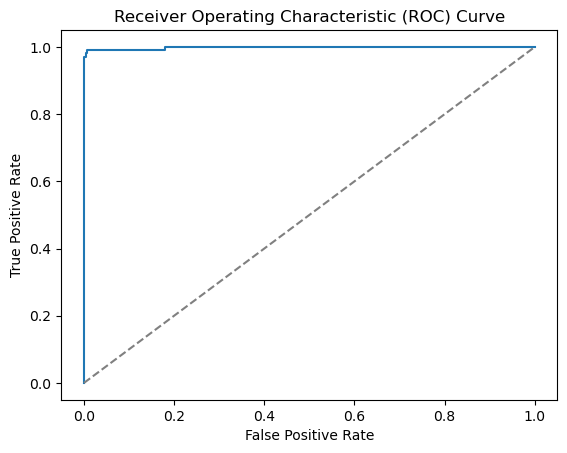

In [184]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# AUC-ROC Curve
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


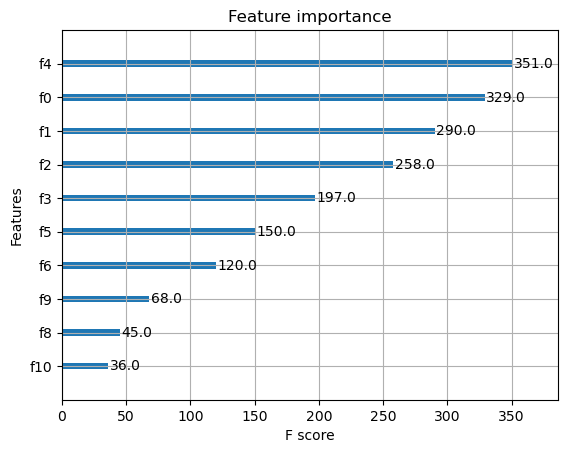

In [185]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.show()


In [186]:
import joblib

# Save the model
joblib.dump(best_model, 'xgboost_model.pkl')

# Load the model
loaded_model = joblib.load('xgboost_model.pkl')


In [187]:
# Get prediction probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class


In [188]:
from sklearn.metrics import roc_auc_score

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")


AUC: 0.9982


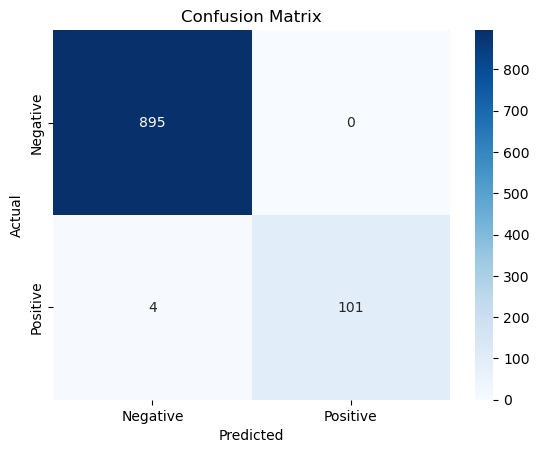

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
